<h1>Question 1</h1>
<h2> part a</h2>
<h3>To identify the top eigenvectors necessary to maintain a cumulative variance exceeding 0.9:</h3>
<p>Begin by loading the data and extracting 2500 samples from each class, forming a subdata set with a total of 25,000 samples, as specified.</p>
<p>Flatten the 32x32 RGB images and apply PCA to obtain the corresponding eigenvectors.</p>
<p>Calculate the variance explained by each principal component and incrementally add eigenvectors until the cumulative variance surpasses or equals 0.9, identifying the top components.</p>
<p>Lastly, visualize the relationship between Proportion of Variance and eigenvectors through a plotted graph.</p>

In [2]:
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


train_data = loadmat('./train_32x32.mat')



/home/vishal27/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
#data Extration (features)
X_train = train_data['X']
y_train = train_data['y']
classes = len(np.unique(y_train))
# print(classes)

# Create an empty list to store indices for each class
subset_classes = []

# Iterate over each class
for class_label in range(classes):
    # print(class_label)
    # Find indices of samples belonging to the current class
    indices_for_class = np.where(y_train == class_label+1)[0]
    
    # Check if there are enough samples for the current class
    if len(indices_for_class) >= 2500:
        # Randomly select 2500 samples if available
        selected_indices = np.random.choice(indices_for_class, size=2500, replace=False)
        subset_classes.extend(selected_indices)
    else:
        # If there are not enough samples, use all available samples for this class
        subset_classes.extend(indices_for_class)

# Convert the list to a NumPy array
subset_classes = np.array(subset_classes)
print(subset_classes)

# New dataset of size 2500
subset_classes_X_train = X_train[:, :, :, subset_classes ]
subset_classes_Y_train = y_train[subset_classes ]
# Flatten the data for PCA
X_train_2D = subset_classes_X_train.reshape((32*32*3,-1))
print(X_train_2D.shape)

# Standardize the data
scaler = StandardScaler()
X_train_standardized = X_train_2D.T
print(X_train_standardized.shape)

[55931 70078  9316 ... 51511 11393 58989]
(3072, 25000)
(25000, 3072)


(25000, 3072)
[[ 2.30381847e+03 -8.29585741e+01  4.23346486e+01 ...  6.98514150e-02
  -1.03314783e-01 -3.00739442e-01]
 [ 1.70166427e+02  1.20298342e+02 -1.13472574e+03 ... -5.72526712e-01
   1.86250208e-01 -4.60320452e-02]
 [-9.26136807e+02 -4.29994586e+02 -5.88133072e+02 ...  8.11698128e-02
   9.81268124e-02 -2.49987080e-01]
 ...
 [ 2.66547997e+03 -2.59590941e+02  4.09395482e+02 ...  1.16868674e-01
  -1.30024449e-01 -2.81807074e-01]
 [ 3.10565437e+02 -7.04881477e+02 -6.06071306e+02 ... -7.10533592e-02
  -2.81305598e-01 -8.62587266e-03]
 [ 1.77782187e+03  9.50367456e+02 -5.27116117e+02 ... -1.34029191e-01
   1.83542446e-01 -5.49358543e-01]]


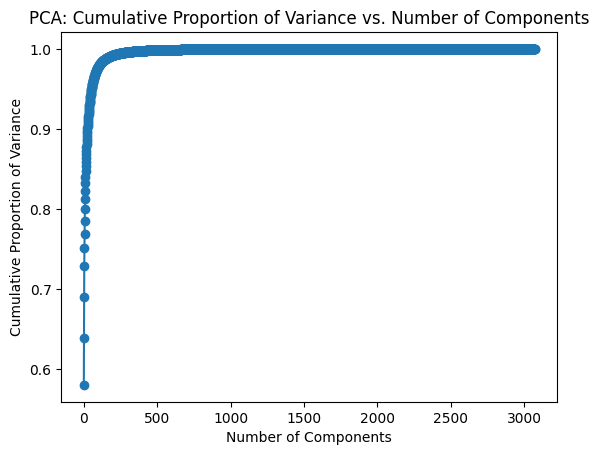

Number of components to keep 90% variance: 26


In [4]:


# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_standardized)
print(X_train_pca.shape)
print(X_train_pca)
# Cumulative sum of explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to keep for 90% variance
num_components_90 = np.argmax(cumulative_variance > 0.9) + 1

# Plot PoV against the number of components
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion of Variance')
plt.title('PCA: Cumulative Proportion of Variance vs. Number of Components')
plt.show()

print(f"Number of components to keep 90% variance: {num_components_90}")

<h2>part b</h2>
<h3>To reconstruct 10 samples from the SVHN dataset (one from each class) using the top 10 eigenvectors:</h3>
<p>We began by choosing 10 samples from each class, flattening the selected samples, and transforming them using all available eigenvectors.</p>
<p>Subsequently, the reconstruction process was carried out utilizing the top 10 eigenvectors.</p>
<p>Ultimately, the original and reconstructed samples were presented for comparison.</p>

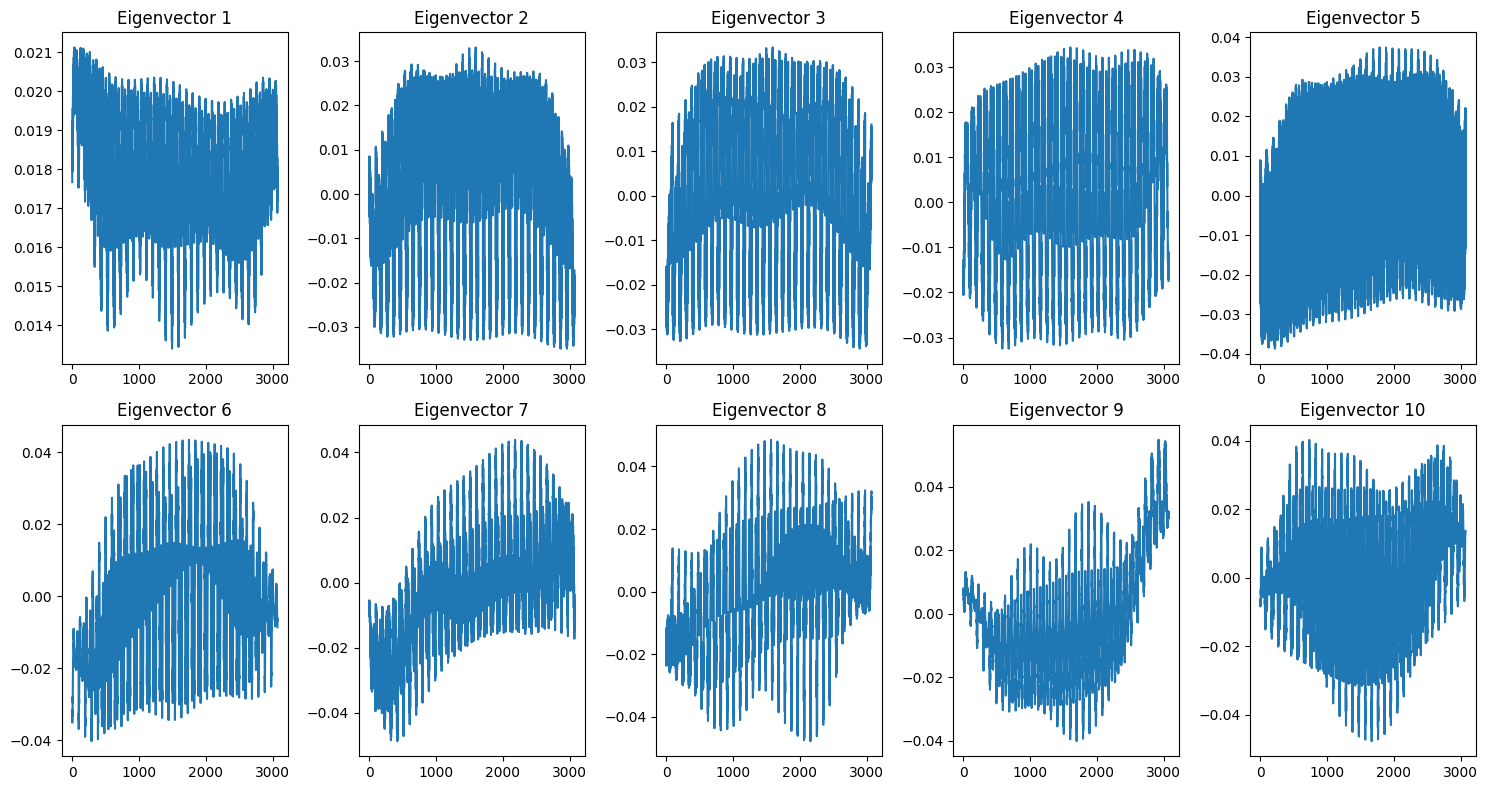

In [5]:
# Assuming top_10_eigenvectors is a 2D array where each row is an eigenvector
top_10_eigenvectors = pca.components_[:10, :]

# Plotting the values along each dimension for the top 10 eigenvectors
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.plot(top_10_eigenvectors[i])
    plt.title(f'Eigenvector {i + 1}')

plt.tight_layout()
plt.show()

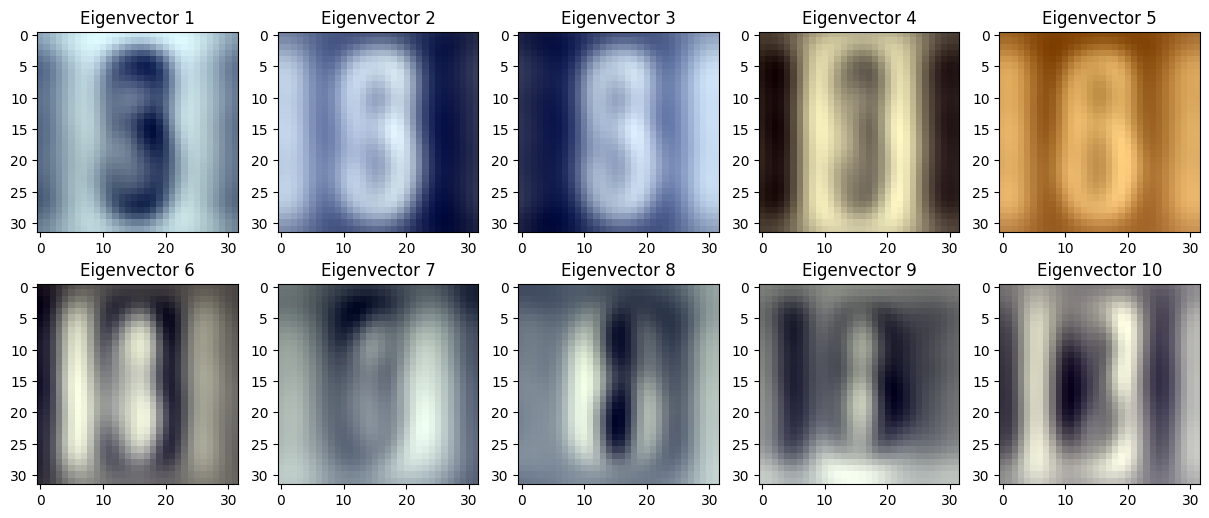

In [6]:


fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    # Reshape eigenvector to image shape
    reshaped_eigenvector = top_10_eigenvectors[i].reshape((32, 32, 3))

    # Convert values to [0, 255] range
    normalized_eigenvector = ((reshaped_eigenvector - reshaped_eigenvector.min()) / 
                              (reshaped_eigenvector.max() - reshaped_eigenvector.min()) * 255)

    # Display the eigenvector as an image
    ax.imshow(normalized_eigenvector.astype(np.uint8), cmap='magma')

    ax.set_title(f'Eigenvector {i + 1}')

plt.show()


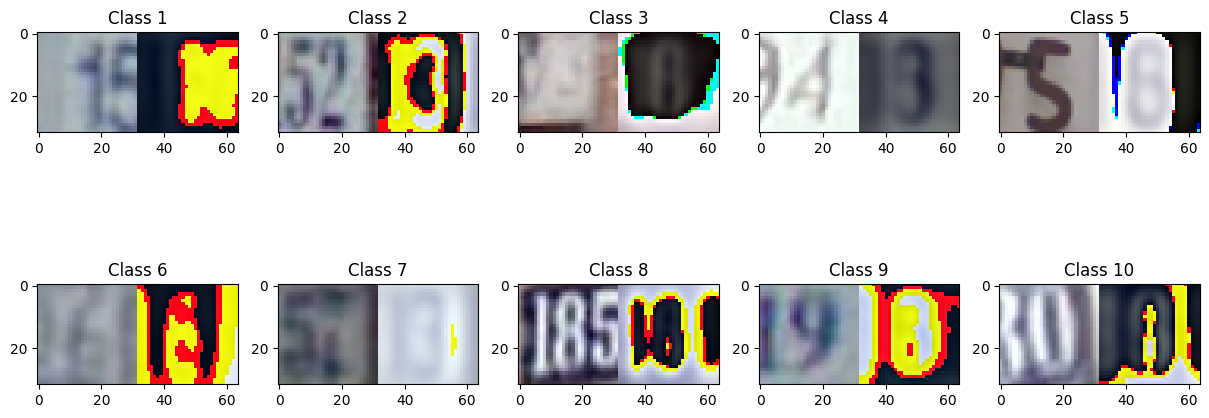

In [7]:
# Use the top 10 eigenvectors for reconstruction
top_10_eigenvectors = pca.components_[:10, :]

# Reconstruct 10 samples (one from each class) using the top 10 eigenvectors
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    # Select one sample from each class
    class_indices = np.where(subset_classes_Y_train == i + 1)[0]
    sample_index = np.random.choice(class_indices, size=1)[0]
    
    # Get the original image
    original_image = subset_classes_X_train[:, :, :, sample_index]
    
    # Flatten the original image for reconstruction
    original_flattened = original_image.reshape((32*32*3, -1)).T
    
    # Project the flattened image onto the top 10 eigenvectors
    projected_image = np.dot(original_flattened, top_10_eigenvectors.T)
    
    # Reconstruct the image using the top 10 eigenvectors
    reconstructed_image = np.dot(projected_image, top_10_eigenvectors) + pca.mean_
    
    # Reshape the reconstructed image to its original shape
    reconstructed_image = reconstructed_image.reshape((32, 32, 3))
    
    # Display the original and reconstructed images side by side
    ax.imshow(np.hstack([original_image.astype(np.uint8), reconstructed_image.astype(np.uint8)]))
    ax.set_title(f"Class {i + 1}")

plt.show()


In [8]:
print("Shape of X_train_pca[:, :10]:", X_train_pca[:, :10].shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_pca[:, :10]: (25000, 10)
Shape of y_train: (73257, 1)


<h2>Part c</h2> <p>To commence this segment, the initial step involves loading the test data and transforming the flattened test data using the PCA model established during training.</p>
    <p>Utilizing built-in functions for k-NN classification, we employed the .fit method for training and the .predict method for making predictions on the test data.</p>
    <p>Ultimately, accuracy measurements are obtained for three specified scenarios with k values set to 5 and 7.</p>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Flatten the raw data for k-NN
X_train_raw_flattened = X_train_standardized.reshape((32*32*3, -1)).T

# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_train_raw_flattened, y_train.flatten(), test_size=0.2, random_state=42)

# Define the values of k to try
k_values = [5, 7]

for k in k_values:
    # Run k-NN on raw data
    knn_raw = KNeighborsClassifier(n_neighbors=k)
    knn_raw.fit(X_train_raw, y_train_raw)
    y_pred_raw = knn_raw.predict(X_test_raw)
    accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)

    print(f"Accuracy on raw data (k-NN, k={k}): {accuracy_raw:.4f}")

    # Project the raw data onto the top 'num_components_90' eigenvectors
    X_train_pca_projected = np.dot(X_train_raw_flattened, top_10_eigenvectors.T)

    # Split the PCA data into training and testing sets
    X_train_pca_knn, X_test_pca, y_train_pca_knn, y_test_pca = train_test_split(X_train_pca_projected[:, :num_components_90], y_train.flatten(), test_size=0.2, random_state=42)

    # Run k-NN on PCA data
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    knn_pca.fit(X_train_pca_knn, y_train_pca_knn)
    y_pred_pca = knn_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

    print(f"Accuracy after PCA (k-NN, k={k}): {accuracy_pca:.4f}")


KeyboardInterrupt: 

In [11]:
# Top 27 eigenvectors for PCA
top_27_eigenvectors = pca.components_[:num_components_90, :]

# Project the raw data onto the top 27 eigenvectors
X_train_pca_projected_27 = np.dot(X_train_raw_flattened, top_27_eigenvectors.T)
# X_train_pca_projected_27 =X_train_pca[:,:27]

print(X_train_pca_projected_27.shape)
# Split the PCA data into training and testing sets
X_train_pca_knn_27, X_test_pca_27, y_train_pca_knn_27, y_test_pca_27 = train_test_split(X_train_pca_projected_27, y_train.flatten(), test_size=0.2, random_state=42)

# Run k-NN on raw data for k=5
knn_raw_5 = KNeighborsClassifier(n_neighbors=5)
knn_raw_5.fit(X_train_raw, y_train_raw)
y_pred_raw_5 = knn_raw_5.predict(X_test_raw)
accuracy_raw_5 = accuracy_score(y_test_raw, y_pred_raw_5)

# Run k-NN on PCA data with dimension 27 for k=5
knn_pca_27_5 = KNeighborsClassifier(n_neighbors=5)
knn_pca_27_5.fit(X_train_pca_knn_27, y_train_pca_knn_27)
y_pred_pca_27_5 = knn_pca_27_5.predict(X_test_pca_27)
accuracy_pca_27_5 = accuracy_score(y_test_pca_27, y_pred_pca_27_5)

# Run k-NN on raw data for k=7
knn_raw_7 = KNeighborsClassifier(n_neighbors=7)
knn_raw_7.fit(X_train_raw, y_train_raw)
y_pred_raw_7 = knn_raw_7.predict(X_test_raw)
accuracy_raw_7 = accuracy_score(y_test_raw, y_pred_raw_7)

# Run k-NN on PCA data with dimension 27 for k=7
knn_pca_27_7 = KNeighborsClassifier(n_neighbors=7)
knn_pca_27_7.fit(X_train_pca_knn_27, y_train_pca_knn_27)
y_pred_pca_27_7 = knn_pca_27_7.predict(X_test_pca_27)
accuracy_pca_27_7 = accuracy_score(y_test_pca_27, y_pred_pca_27_7)

# Print accuracies
print(f"Accuracy on raw data (k-NN, k=5): {accuracy_raw_5:.4f}")
print(f"Accuracy after PCA (k-NN, k=5, 27 components): {accuracy_pca_27_5:.4f}")
print(f"Accuracy on raw data (k-NN, k=7): {accuracy_raw_7:.4f}")
print(f"Accuracy after PCA (k-NN, k=7, 27 components): {accuracy_pca_27_7:.4f}")


(73257, 26)
Accuracy on raw data (k-NN, k=5): 0.4914
Accuracy after PCA (k-NN, k=5, 27 components): 0.4818
Accuracy on raw data (k-NN, k=7): 0.4926
Accuracy after PCA (k-NN, k=7, 27 components): 0.4904


<h2>Question 2: Part a</h2>

<ul>
    <li>First, we performed k-means clustering with 10 clusters on both raw data and data obtained after PCA with dimensions as in 1(A) and 1(B).</li>
    <li>Next, we identified the indices of images nearest to cluster centroids for each dataset, visualizing them accordingly.</li>
    <li>Finally, we checked whether clusters contained images belonging to the same class. If not, we printed "mixed class."</li>
</ul>

In [10]:
from sklearn.cluster import KMeans


# Flatten the raw data for k-means clustering

# X_train_raw_flattened = X_train.reshape((32*32*3, -1)).T
# print("X_train_raw_flattened",X_train_raw_flattened.shape)
# Perform k-means clustering on raw data
kmeans_raw = KMeans(n_clusters=10,n_init=10, random_state=42)
kmeans_raw.fit(X_train_standardized)


# Get cluster labels and centroids
labels_raw = kmeans_raw.labels_
centroids_raw = kmeans_raw.cluster_centers_
print(labels_raw.shape)
print(centroids_raw.shape)




(25000,)
(10, 3072)


In [11]:
print(labels_raw)
print(centroids_raw)

[9 3 8 ... 9 3 7]
[[ 56.90541543  55.20548961  56.4439911  ...  58.54933234  56.90244807
   58.89688427]
 [142.36148359 142.95378031 143.61112696 ... 139.76205421 140.26048502
  141.37289586]
 [111.76324643 114.17914214 124.19133726 ...  90.90664424  91.00630782
  101.20269134]
 ...
 [161.61165846 165.73809524 173.96551724 ... 108.66256158 105.69293924
  115.78571429]
 [ 96.38751177  90.37056793  83.95450267 ...  98.15845623  92.3796674
   86.37213681]
 [165.72323972 167.7997558  172.16646317 ... 169.32071632 172.15791616
  176.46072446]]


[ 2903  9647 24736 15777  6099  4667 22153 13972  4129   746]
X_train_standardized: (25000, 3072)
[ 2903  9647 24736 15777  6099  4667 22153 13972  4129   746]
(10,)


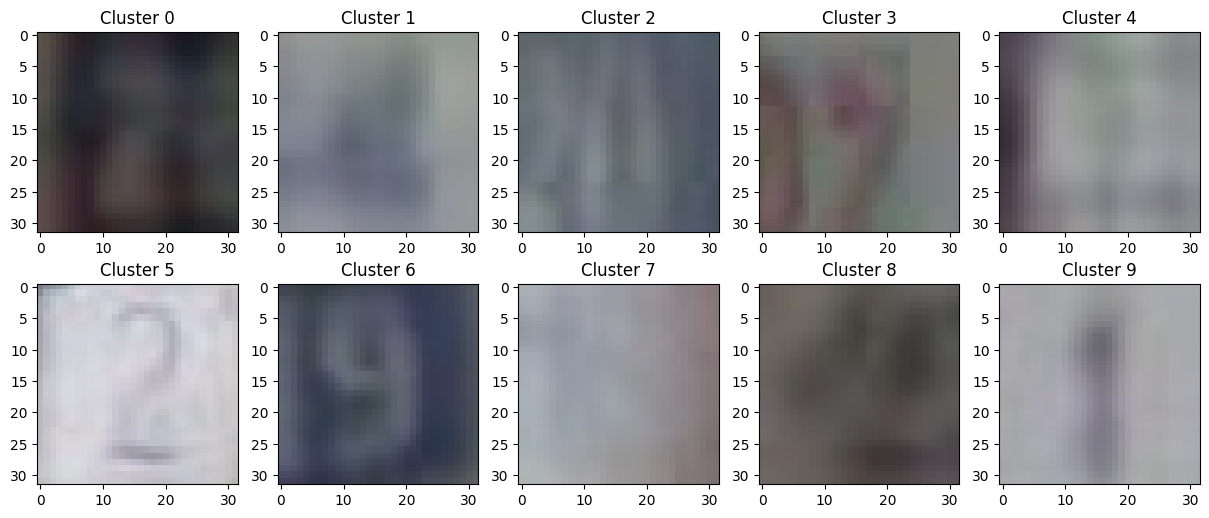

In [12]:

from sklearn.metrics.pairwise import pairwise_distances_argmin_min
closest_image_idx, _  = pairwise_distances_argmin_min(centroids_raw, X_train_standardized)
print(closest_image_idx)
print("X_train_standardized:",X_train_standardized.shape)
print(closest_image_idx)
print(closest_image_idx.shape)
# Visualize the centroids
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    nearest_image = X_train_standardized[closest_image_idx[i]].reshape((32, 32, 3))  # Fix the index
    ax.imshow(nearest_image.astype(np.uint8))
    ax.set_title(f"Cluster {i}")

plt.show()

In [13]:
# Project the raw data onto the top 10 eigenvectors
X_train_pca_projected_10 = X_train_pca[:,:10]
print("X_train_pca_projected_10",X_train_pca_projected_10.shape)
# Perform k-means clustering on PCA data with dimension 10
kmeans_pca_10 = KMeans(n_clusters=10,n_init=10, random_state=42)
kmeans_pca_10.fit(X_train_pca_projected_10)

# Get cluster labels and centroids
labels_pca_10 = kmeans_pca_10.labels_
centroids_pca_10 = kmeans_pca_10.cluster_centers_

# # Visualize the centroids
# fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# for i, ax in enumerate(axes.flat):
#     centroid_image_pca_10 = np.dot(centroids_pca_10[i, :], top_10_eigenvectors) + pca.mean_
#     centroid_image_pca_10 = centroid_image_pca_10.reshape((32, 32, 3))
#     ax.imshow(centroid_image_pca_10.astype(np.uint8))
#     ax.set_title(f"Cluster {i}")

# plt.show()


X_train_pca_projected_10 (25000, 10)


(25000, 3072)
[ 5283 21711 22019 20483  5587  9247 11142 14453 19685 20720]
(10,)


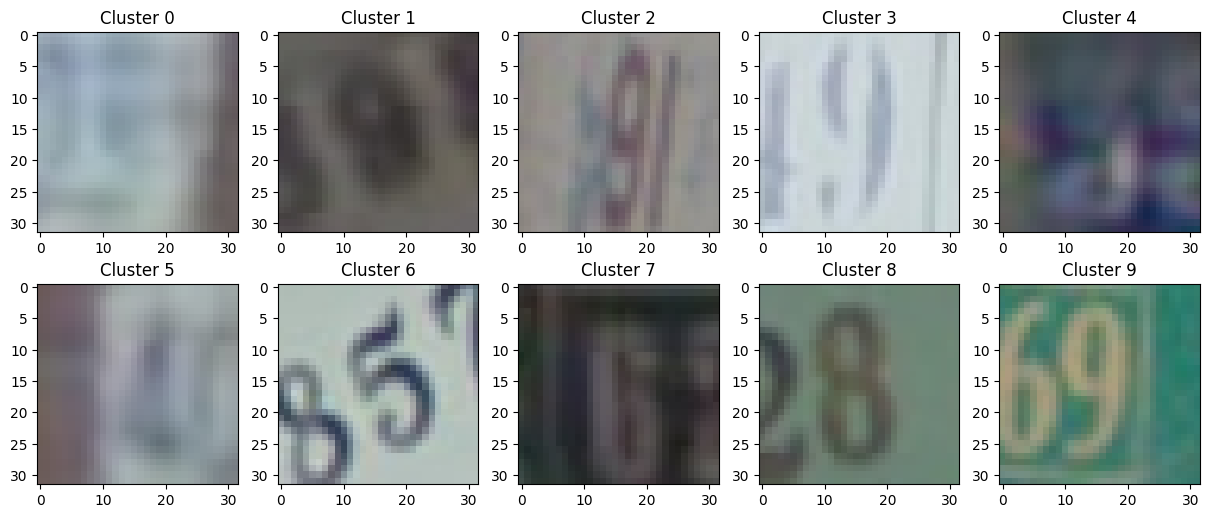

In [14]:
print(X_train_standardized.shape)

closest_image_idx_10, _  = pairwise_distances_argmin_min(centroids_pca_10,X_train_pca_projected_10)
print(closest_image_idx_10)
print(closest_image_idx_10.shape)
# Visualize the centroids
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
j=0
for i, ax in enumerate(axes.flat):
    nearest_image = X_train_standardized[closest_image_idx_10[j]].reshape((32, 32, 3))  # Fix the index
    j +=1
    ax.imshow(nearest_image.astype(np.uint8))
    ax.set_title(f"Cluster {i}")
    

plt.show()

In [15]:
X_train_pca_projected_27 = X_train_pca[:,:27]
print("X_train_pca_projected_27",X_train_pca_projected_27.shape)
# Perform k-means clustering on PCA data with dimension 10
kmeans_pca_27 = KMeans(n_clusters=10,n_init=10, random_state=42)
kmeans_pca_27.fit(X_train_pca_projected_27)

# Get cluster labels and centroids
labels_pca_27 = kmeans_pca_27.labels_
centroids_pca_27 = kmeans_pca_27.cluster_centers_

X_train_pca_projected_27 (25000, 27)


[ 1896 12318  4667 23287 16428 22019 15777 12905  2476 24736]
(10,)


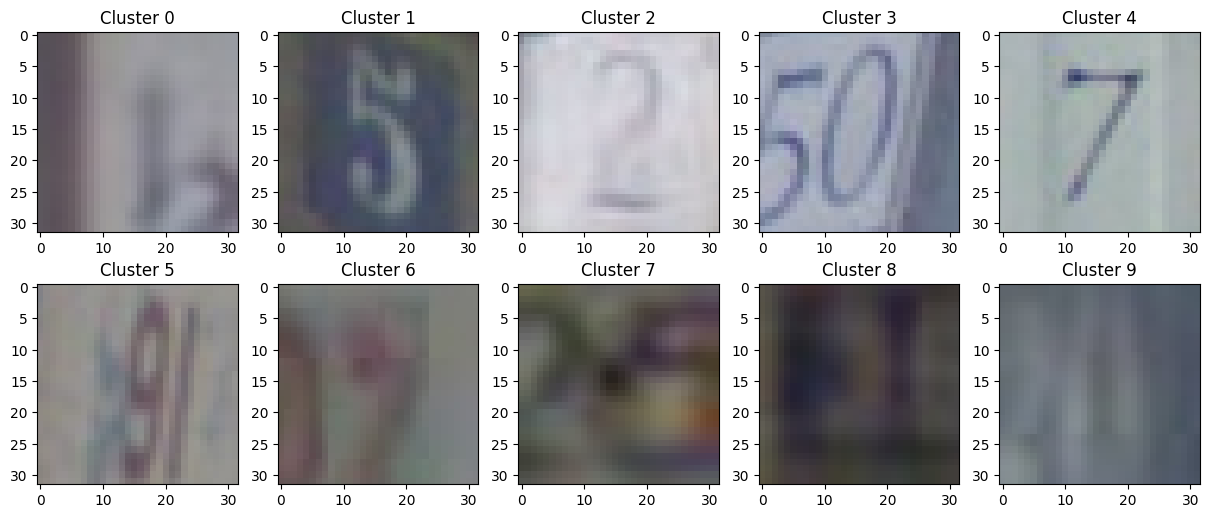

In [16]:

closest_image_idx_27, _  = pairwise_distances_argmin_min(centroids_pca_27,X_train_pca_projected_27)
print(closest_image_idx_27)
print(closest_image_idx_27.shape)
# Visualize the centroids
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
j=0
for i, ax in enumerate(axes.flat):
    nearest_image = X_train_standardized[closest_image_idx_27[j]].reshape((32, 32, 3))  # Fix the index
    j += 1
    ax.imshow(nearest_image.astype(np.uint8))
    ax.set_title(f"Cluster {i}")
    

plt.show()

In [17]:
from collections import defaultdict


def find_mixed_classes(labels, true_labels):
    cluster_info = defaultdict(list)

    for i in range(len(labels)):
        cluster_info[labels[i]].append(true_labels[i])

    mixed_clusters = []

    for cluster, classes in cluster_info.items():
        unique_classes = set(classes)
        if len(unique_classes) > 1:
            mixed_clusters.append(cluster)

    return mixed_clusters

# Assuming y_train is a dictionary loaded using loadmat


# # Raw data clustering
# kmeans_raw = KMeans(n_clusters=10, n_init=10, random_state=42)
# kmeans_raw.fit(X_train_standardized)
# labels_raw = kmeans_raw.labels_

y_train_labels_raw = kmeans_raw.predict(X_train_raw_flattened)
mixed_clusters_raw = find_mixed_classes(labels_raw, subset_classes_Y_train.T[0])
print("Mixed clusters for raw data:", mixed_clusters_raw)

# For PCA  part (1)a
y_train_labels_pca_27 = kmeans_pca_27.predict(X_train_pca_projected_27)
mixed_clusters_pca_27 = find_mixed_classes(labels_raw, subset_classes_Y_train.T[0])
print("Mixed clusters for PCA part 1(a) data:", mixed_clusters_pca_27)

y_train_labels_pca_10 = kmeans_pca_10.predict(X_train_pca_projected_10)
mixed_clusters_pca_10 = find_mixed_classes(labels_raw, subset_classes_Y_train.T[0])
print("Mixed clusters for PCA part 1(b) data:", mixed_clusters_pca_10)


Mixed clusters for raw data: [9, 3, 8, 6, 1, 0, 4, 2, 5, 7]
Mixed clusters for PCA part 1(a) data: [9, 3, 8, 6, 1, 0, 4, 2, 5, 7]
Mixed clusters for PCA part 1(b) data: [9, 3, 8, 6, 1, 0, 4, 2, 5, 7]


<h2>Part b:</h2>

<ul>
    <li>Code has been implemented to calculate the sum squared error for all clusters obtained from K-Means clustering on the dataset.</li>
    <li>The "Sum Squared Error" has been individually calculated for each cluster.</li>
    <li>Cumulative sum squared error has been computed for all three sets of clustered data.</li>
    <li>Purity metric for each of the three clustered datasets has been determined by forming a contingency matrix.</li>
    <li>The "Rand Index" metric for all three sets of clustered data has been calculated using the <code>rand_score</code> inbuilt function.</li>
</ul>

In [18]:
def calculate_sse_per_cluster(centroids, data, labels):
    sse_per_cluster = defaultdict(float)

    unique_labels = np.unique(labels)

    for cluster_label in unique_labels:
        indices = np.where(labels==cluster_label)[0]
        cluster_points=data[indices]
        # cluster_points = data[labels ]
        centroid = centroids[cluster_label]
        
        sse_per_cluster[cluster_label] = np.sum(np.sum((cluster_points - centroid.reshape(1, -1)) ** 2, axis=1))

    return sse_per_cluster

# ... (rest of your code)

# Calculate SSE for raw data
sse_raw = calculate_sse_per_cluster(centroids_raw, X_train_standardized, labels_raw)
print("SSE per cluster for raw data:")
for cluster_label, sse in sse_raw.items():
    print(f"Cluster {cluster_label}: {sse}")
# print("ab",np.sum(sse_raw[1]))
# print("cd",kmeans_raw.inertia_)
# Calculate SSE for PCA part 1(a) data
sse_pca_27 = calculate_sse_per_cluster(centroids_pca_27, X_train_pca_projected_27, labels_pca_27)
print("SSE per cluster for PCA part 1(a) data:")
for cluster_label, sse in sse_pca_27.items():
    print(f"Cluster {cluster_label}: {sse}")

sse_pca_10 = calculate_sse_per_cluster(centroids_pca_10, X_train_pca_projected_10, labels_pca_10)
print("SSE per cluster for PCA part 1(b) data:")
for cluster_label, sse in sse_pca_10.items():
    print(f"Cluster {cluster_label}: {sse}")

SSE per cluster for raw data:
Cluster 0: 5614431948.712167
Cluster 1: 10973441330.29843
Cluster 2: 9749241062.381832
Cluster 3: 10300843078.676516
Cluster 4: 4877949916.87194
Cluster 5: 5899288199.656994
Cluster 6: 9793844069.777983
Cluster 7: 5774314267.632183
Cluster 8: 7044927030.140571
Cluster 9: 10455380761.663818
SSE per cluster for PCA part 1(a) data:
Cluster 0: 3716167102.051428
Cluster 1: 7271645843.469696
Cluster 2: 4562676144.178505
Cluster 3: 4626598218.793824
Cluster 4: 8043830125.087762
Cluster 5: 8189541959.561309
Cluster 6: 7698705812.303814
Cluster 7: 5449103116.848272
Cluster 8: 4323613511.139371
Cluster 9: 7542110238.943604
SSE per cluster for PCA part 1(b) data:
Cluster 0: 3370176287.147668
Cluster 1: 4323940871.94928
Cluster 2: 5890184242.31895
Cluster 3: 3449915070.110208
Cluster 4: 5237036442.721937
Cluster 5: 2861118730.9242096
Cluster 6: 5764352422.577171
Cluster 7: 3528528228.5296593
Cluster 8: 5792134336.6355295
Cluster 9: 5362334087.504152


In [20]:
from sklearn.metrics import rand_score
from sklearn.metrics.cluster import contingency_matrix

def evaluate_clustering_performance(true_labels, predicted_labels):
    """
    Evaluate clustering performance using Rand Index and Purity.

    Parameters:
    - true_labels: Array of true class labels.
    - predicted_labels: Array of predicted cluster labels.

    Returns:
    - rand_index: Rand Index value.
    - purity: Purity value.
    """
    # Calculate Rand Index
    rand_index = rand_score(true_labels, predicted_labels)

    # Calculate Purity
    conf_matrix = contingency_matrix(true_labels, predicted_labels)
    purity = np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)

    return rand_index, purity

print(labels_raw.shape)
rand_index_raw, purity_raw = evaluate_clustering_performance(subset_classes_Y_train.T[0], labels_raw)
rand_index_pca_27, purity_pca_27 = evaluate_clustering_performance(subset_classes_Y_train.T[0], labels_pca_27)
rand_index_pca_10, purity_pca_10 = evaluate_clustering_performance(subset_classes_Y_train.T[0], labels_pca_10)
print("Rand Index for raw data:", rand_index_raw)
print("Purity for raw data:", purity_raw)
print("Rand Index for 27 data:", rand_index_pca_27)
print("Purity for 27 data:", purity_pca_27)
print("Rand Index for 10 data:", rand_index_pca_10)
print("Purity for 10 data:", purity_pca_10)



(25000,)
Rand Index for raw data: 0.8085235409416377
Purity for raw data: 0.1154
Rand Index for 27 data: 0.8091314596583863
Purity for 27 data: 0.11564
Rand Index for 10 data: 0.8085765318612744
Purity for 10 data: 0.11524


<h2>Part c:</h2>

<ul>
    <li>The code includes functions to assign class labels to clusters.</li>
    <li>Using this unsupervised method, accuracy for test data is calculated.</li>
</ul>

In [24]:
from sklearn.metrics import accuracy_score

def assign_most_frequent_label(cluster_labels, true_labels):
    unique_clusters = np.unique(cluster_labels)
    assigned_labels = [0,0,0,0,0,0,0,0,0,0]
    
    for cluster in unique_clusters:
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_true_labels = true_labels[cluster_indices]
        most_frequent_label = np.bincount(cluster_true_labels).argmax()
        # assigned_labels.extend([most_frequent_label] * len(cluster_indices))
        assigned_labels[cluster]=most_frequent_label
    
    return np.array(assigned_labels)
# print(subset_classes_Y_train.T[0].shape)
# Assign most frequent labels for raw data clustering
predicted_labels_raw = assign_most_frequent_label(labels_raw, subset_classes_Y_train.T[0])

# Assign most frequent labels for PCA part 1(a) data clustering
predicted_labels_pca_27 = assign_most_frequent_label(labels_pca_27, subset_classes_Y_train.T[0])

# Assign most frequent labels for PCA part 1(b) data clustering
predicted_labels_pca_10 = assign_most_frequent_label(labels_pca_10, subset_classes_Y_train.T[0])
test_data=loadmat('./test_32x32.mat')
X_test=test_data['X'].reshape((32*32*3,-1))
X_test_data=X_test.T
test_labels=test_data['y']
x_test_pca=pca.transform(X_test_data)
x_test_pca_27=x_test_pca[:,:27]
x_test_pca_10=x_test_pca[:,:10]
y_kmeans_test_raw=kmeans_raw.predict(X_test_data)
y_kmeans_test_pca_27=kmeans_pca_27.predict(x_test_pca_27)
y_kmeans_test_pca_10=kmeans_pca_10.predict(x_test_pca_10)

def evaluate_clustering_accuracy(y_kmeans_test, classlabel_to_cluster_map, true_labels):
    count_accuracy = 0
    for i in range(len(y_kmeans_test)):
        predicted_test_class_label = classlabel_to_cluster_map[y_kmeans_test[i]]
        if predicted_test_class_label == true_labels[i]:
            count_accuracy += 1
    accuracy = count_accuracy / len(y_kmeans_test)
    return accuracy

# Assuming y_test is a dictionary loaded using loadmat
y_test_labels =test_labels.T[0]

# Assign most frequent labels for test data clustering
predicted_labels_test = assign_most_frequent_label(labels_raw, subset_classes_Y_train.T[0])
# Evaluate clustering accuracy for raw data
accuracy_raw = evaluate_clustering_accuracy(y_kmeans_test_raw,predicted_labels_raw,y_test_labels)
print("Clustering Accuracy for Raw Data:", accuracy_raw)



predicted_labels_test = assign_most_frequent_label(labels_pca_27, subset_classes_Y_train.T[0])
# Evaluate clustering accuracy for raw data
accuracy_pca_27 = evaluate_clustering_accuracy(y_kmeans_test_pca_27,predicted_labels_pca_27,y_test_labels)
print("Clustering Accuracy for 27 Data:", accuracy_pca_27)

predicted_labels_test = assign_most_frequent_label(labels_pca_10, subset_classes_Y_train.T[0])
# Evaluate clustering accuracy for raw data
accuracy_pca_10 = evaluate_clustering_accuracy(y_kmeans_test_pca_10,predicted_labels_pca_10,y_test_labels)
print("Clustering Accuracy for 10 Data:", accuracy_pca_10)
# print(predicted_labels_raw.shape)

# # Calculate accuracy
# accuracy_raw = accuracy_score(y_kmeans_test_raw, predicted_labels_raw)
# accuracy_pca_27 = accuracy_score(y_train_labels, predicted_labels_pca_27)
# accuracy_pca_10 = accuracy_score(y_train_labels, predicted_labels_pca_10)

# print("Accuracy for raw data clustering:", accuracy_raw)
# print("Accuracy for PCA part 1(a) data clustering:", accuracy_pca_27)
# print("Accuracy for PCA part 1(b) data clustering:", accuracy_pca_10)

Clustering Accuracy for Raw Data: 0.09438383527965581
Clustering Accuracy for 27 Data: 0.09469114935464044
Clustering Accuracy for 10 Data: 0.09449907805777505



<h2>Part d:</h2>

<ul>
    <li>Executed K-Means clustering with 5 clusters on data post-PCA with dimensions outlined in 1(A).</li>
    <li>Computed the "Sum Squared Error" for each cluster and the "Cumulative Sum Squared Error."</li>
    <li>Identified and printed various types of classes present in each cluster.</li>
</ul>

In [25]:

X_train_pca_projected_27=X_train_pca[:,:27]
kmeans_pca_27_partd = KMeans(n_clusters=5,n_init=10, random_state=42)
kmeans_pca_27_partd.fit(X_train_pca_projected_27)

# Get cluster labels and centroids
labels_pca_27_partd = kmeans_pca_27_partd.labels_
print(X_train_pca_projected_27.shape)
print(np.unique(labels_pca_27_partd))
centroids_pca_27_partd = kmeans_pca_27_partd.cluster_centers_
sse_pca_27 = calculate_sse_per_cluster(centroids_pca_27_partd, X_train_pca_projected_27, labels_pca_27_partd)
print("SSE per cluster for PCA part 1(a) data:")
for cluster_label, sse in sse_pca_27.items():
    print(f"Cluster {cluster_label}: {sse}")

mixed_clusters_pca_27_partd = find_mixed_classes(labels_pca_27_partd, y_train_labels_pca_27)
print("cluster label with mixed classes:", mixed_clusters_pca_27_partd)
# print(np.where(labels_pca_27_partd==mixed_clusters_pca_27_partd))
for i in mixed_clusters_pca_27_partd: 
    a=np.unique(subset_classes_Y_train.T[0][np.where(labels_pca_27_partd==i)[0]])
    print(a)

(25000, 27)
[0 1 2 3 4]
SSE per cluster for PCA part 1(a) data:
Cluster 0: 16359752930.142315
Cluster 1: 18133742239.621872
Cluster 2: 10031002680.055798
Cluster 3: 18736304876.806652
Cluster 4: 8004566225.178047
cluster label with mixed classes: [0, 3, 1, 2, 4]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
